# KMeans

In [ ]:
import pandas as pd
import numpy as np

In [1]:
# import dataset
from sklearn import datasets

# load the iris datasets
iris = datasets.load_iris() # X is going to be iris.data
# ignoring iris.target because it is unsupervised

!!!! SCALE DATA FIRST !!!!

In [26]:
# imports
from sklearn.cluster import KMeans

# create classifier object model 
model = KMeans(n_clusters=3, random_state=0)
# fit model
kmeans = model.fit(iris.data)

# predict labels
labels = model.fit_predict(iris.data) # more convenient than fit then predict
kmeans.labels_ # attribute not method

# returns new representation of X based on the fit
transform = model.fit_transform(iris.data) # more efficient than fit then transform

## Example: plotting iris dataset in 3D with k=8, 5, 3

/Users/andreafabry/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


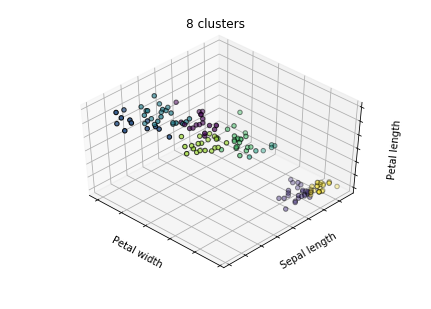

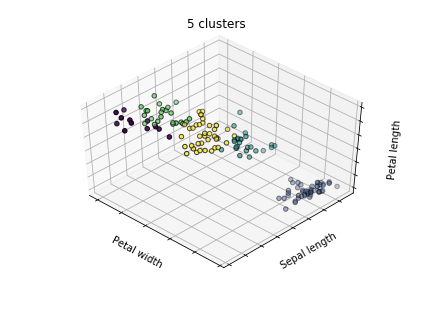

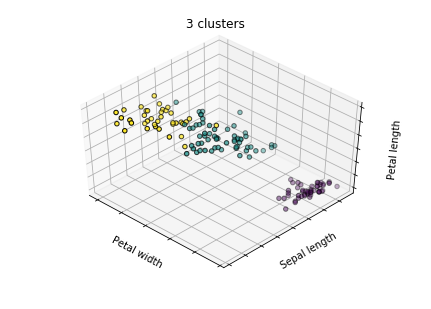

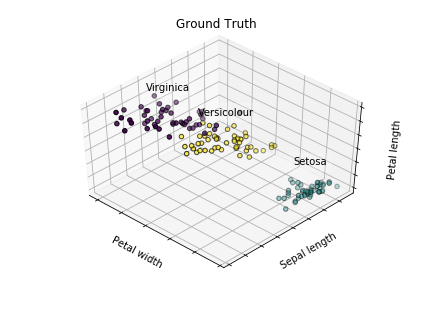

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_5', KMeans(n_clusters=5)),
              ('k_means_iris_3', KMeans(n_clusters=3))]

fignum = 1
titles = ['8 clusters', '5 clusters', '3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 4))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()